****Introduction****

- objective: price prediction and forecasting for BXP (Boston Properties) using stacked LSTM (deep learning)

***Note***: This uses code referenced from here (https://www.youtube.com/watch?v=H6du_pfuznE). Most or none is original code from me. Instead, this notebook is about practice and understanding deep learning methods

****Overview****

Process
1. collect data / read in data
2. Preprocess the data (train and test split)
    - Time series data needs special split
    - "special split" involves using time steps to predict the next day's price
    - normal train/test splits disregard order of date time
3. Create a Stacked LSTM model
4. Predict test data and plot output
5. Predict the future 30 days and plot output

****1. Collect Data / Read in Data****

In [17]:
# Importing the libraries
import os
import math
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('BXP.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-14,83.989998,86.529999,83.989998,85.910004,82.503426,986200
1,2020-09-15,86.250000,89.559998,86.250000,87.769997,84.289665,1044500
2,2020-09-16,87.760002,90.680000,86.430000,89.930000,86.364014,1771100
3,2020-09-17,88.940002,89.910004,87.389999,87.870003,84.385696,1466900
4,2020-09-18,86.970001,87.540001,84.709999,84.870003,81.504669,2147300


In [21]:
close_df = df.reset_index()['Close']

In [22]:
close_df.head()

0    85.910004
1    87.769997
2    89.930000
3    87.870003
4    84.870003
Name: Close, dtype: float64

In [23]:
close_df.shape

(251,)

In [24]:
import matplotlib.pyplot as plt

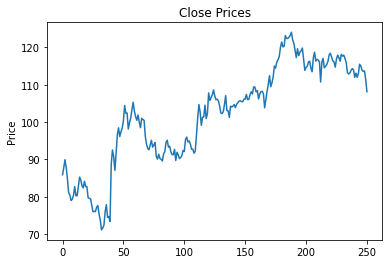

In [28]:
plt.plot(close_df)
plt.title('Close Prices')
plt.ylabel('Price')
plt.show()

****2. Preprocessing data****

In [18]:
# LSTM is sensitive to teh scale of the data ==> apply MinMax Scaler

In [19]:
import numpy as np

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
close_df = scaler.fit_transform(np.array(close_df).reshape(-1,1))

In [30]:
close_df.shape

(251, 1)

In [32]:
close_df

array([[0.2791226 ],
       [0.31429644],
       [0.3551437 ],
       [0.31618763],
       [0.2594554 ],
       [0.18835098],
       [0.1768154 ],
       [0.14844929],
       [0.15563532],
       [0.17454606],
       [0.21898642],
       [0.17265502],
       [0.17303331],
       [0.22087747],
       [0.26701959],
       [0.25245837],
       [0.22295765],
       [0.21236754],
       [0.24621779],
       [0.21993188],
       [0.21841898],
       [0.16282149],
       [0.15998486],
       [0.15790466],
       [0.12329796],
       [0.09171706],
       [0.09436455],
       [0.09266266],
       [0.11478819],
       [0.12329796],
       [0.0805598 ],
       [0.04897875],
       [0.        ],
       [0.00926621],
       [0.02382757],
       [0.09266266],
       [0.12764751],
       [0.0631618 ],
       [0.06788949],
       [0.04273832],
       [0.33320719],
       [0.40431162],
       [0.37159611],
       [0.30143712],
       [0.38710292],
       [0.48127832],
       [0.51645232],
       [0.472

In [37]:
#splitting dataset into train and test data
training_size=int(len(close_df)*0.70)
test_size = len(close_df) - training_size
train_data, test_data = close_df[0:training_size,:], close_df[training_size:len(close_df),:]

In [41]:
# Convert array of values into a dataset matrix

def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
# reshape 
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [44]:
X_train.shape

(144, 30)

In [47]:
y_train.shape

(144,)

****3. Create Stacked LSTM Model****

In [48]:
# reshaping input to be [samples, time steps, features] (required for LSTM)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [51]:
pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)

  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached grpcio-1.40.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Attempting uninstall: h5py
    Found existing 

In [ ]:
# Create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [56]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100,batch_size=64, verbose=1)

Epoch 1/100
3/3 [==============================] - 14s 1s/step - loss: 0.2378 - val_loss: 0.2663
Epoch 2/100
3/3 [==============================] - 1s 311ms/step - loss: 0.0853 - val_loss: 0.0037
Epoch 3/100
3/3 [==============================] - 0s 144ms/step - loss: 0.0305 - val_loss: 0.0458
Epoch 4/100
3/3 [==============================] - 1s 250ms/step - loss: 0.0356 - val_loss: 0.0052
Epoch 5/100
3/3 [==============================] - 1s 334ms/step - loss: 0.0152 - val_loss: 0.0527
Epoch 6/100
3/3 [==============================] - 1s 310ms/step - loss: 0.0256 - val_loss: 0.0548
Epoch 7/100
3/3 [==============================] - 1s 318ms/step - loss: 0.0218 - val_loss: 0.0218
Epoch 8/100
3/3 [==============================] - 1s 273ms/step - loss: 0.0139 - val_loss: 0.0028
Epoch 9/100
3/3 [==============================] - 0s 105ms/step - loss: 0.0155 - val_loss: 0.0014
Epoch 10/100
3/3 [==============================] - 0s 101ms/step - loss: 0.0167 - val_loss: 0.0042
Epoch 11/10

3/3 [==============================] - 0s 107ms/step - loss: 0.0040 - val_loss: 0.0086
Epoch 74/100
3/3 [==============================] - 0s 105ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 75/100
3/3 [==============================] - 0s 100ms/step - loss: 0.0041 - val_loss: 0.0082
Epoch 76/100
3/3 [==============================] - 0s 112ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 77/100
3/3 [==============================] - 0s 98ms/step - loss: 0.0040 - val_loss: 0.0078
Epoch 78/100
3/3 [==============================] - 0s 109ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 79/100
3/3 [==============================] - 0s 115ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 80/100
3/3 [==============================] - 0s 106ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 81/100
3/3 [==============================] - 0s 112ms/step - loss: 0.0047 - val_loss: 0.0088
Epoch 82/100
3/3 [==============================] - 0s 116ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 83/100
3

In [59]:
import tensorflow as tf

In [60]:
tf.__version__

'2.6.0'

****4. Predict Test Data and Plot****

In [62]:
# predict and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [65]:
# Reverse Transform data
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

98.02886682721359

In [67]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

116.35448587140013

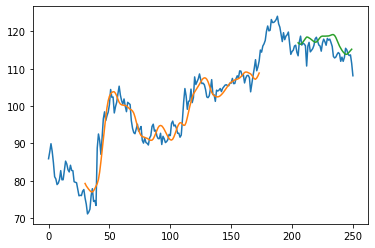

In [68]:
# Plotting

# shift train predictions for plot
look_back = 30
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test preidcitons for plot
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1,:] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

****5. Predict next 30 days and Plot****

In [69]:
len(test_data)

76

In [70]:
x_input = test_data[46:].reshape(1,-1)
x_input.shape

(1, 30)

In [71]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [72]:
temp_input

[0.8742435253920307,
 0.8545763344124242,
 0.8494705096144388,
 0.8233737229599316,
 0.8645991602457919,
 0.8840772059801743,
 0.8712178822551748,
 0.8532526013569934,
 0.8878592788119861,
 0.8791603562307313,
 0.8842663512253983,
 0.867057500022173,
 0.8473903090425665,
 0.7963313613652439,
 0.7889561907501621,
 0.7936838763436391,
 0.8072994784776557,
 0.8163767104601005,
 0.8099471147851993,
 0.7719364847921604,
 0.7931164216972251,
 0.7719364847921604,
 0.7912253852813191,
 0.8379349378556129,
 0.8296141733896092,
 0.8080559270833545,
 0.8012480598287479,
 0.804462980586024,
 0.7611573805497756,
 0.6989410192288776]

In [73]:
from numpy import array

lst_output = []
n_steps = 30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i+=1
        
print(lst_output) 

[0.83020335]
31
1 day input [0.85457633 0.84947051 0.82337372 0.86459916 0.88407721 0.87121788
 0.8532526  0.88785928 0.87916036 0.88426635 0.8670575  0.84739031
 0.79633136 0.78895619 0.79368388 0.80729948 0.81637671 0.80994711
 0.77193648 0.79311642 0.77193648 0.79122539 0.83793494 0.82961417
 0.80805593 0.80124806 0.80446298 0.76115738 0.69894102 0.83020335]
1 day output [[0.8246583]]
2 day input [0.84947051 0.82337372 0.86459916 0.88407721 0.87121788 0.8532526
 0.88785928 0.87916036 0.88426635 0.8670575  0.84739031 0.79633136
 0.78895619 0.79368388 0.80729948 0.81637671 0.80994711 0.77193648
 0.79311642 0.77193648 0.79122539 0.83793494 0.82961417 0.80805593
 0.80124806 0.80446298 0.76115738 0.69894102 0.83020335 0.82465827]
2 day output [[0.82137674]]
3 day input [0.82337372 0.86459916 0.88407721 0.87121788 0.8532526  0.88785928
 0.87916036 0.88426635 0.8670575  0.84739031 0.79633136 0.78895619
 0.79368388 0.80729948 0.81637671 0.80994711 0.77193648 0.79311642
 0.77193648 0.7912253

23 day output [[0.98904437]]
24 day input [0.82961417 0.80805593 0.80124806 0.80446298 0.76115738 0.69894102
 0.83020335 0.82465827 0.82137674 0.82107371 0.82370579 0.82844406
 0.83478314 0.84228224 0.85049349 0.85890919 0.86756873 0.87631524
 0.88519728 0.89419043 0.90339351 0.91260612 0.9218201  0.93104804
 0.94034827 0.94979531 0.95949262 0.96919501 0.97909564 0.98904437]
24 day output [[0.9989944]]
25 day input [0.80805593 0.80124806 0.80446298 0.76115738 0.69894102 0.83020335
 0.82465827 0.82137674 0.82107371 0.82370579 0.82844406 0.83478314
 0.84228224 0.85049349 0.85890919 0.86756873 0.87631524 0.88519728
 0.89419043 0.90339351 0.91260612 0.9218201  0.93104804 0.94034827
 0.94979531 0.95949262 0.96919501 0.97909564 0.98904437 0.99899441]
25 day output [[1.0091854]]
26 day input [0.80124806 0.80446298 0.76115738 0.69894102 0.83020335 0.82465827
 0.82137674 0.82107371 0.82370579 0.82844406 0.83478314 0.84228224
 0.85049349 0.85890919 0.86756873 0.87631524 0.88519728 0.89419043
 0.

In [78]:
day_new = np.arange(1,31)
day_pred = np.arange(31, 61)

In [75]:
import matplotlib.pyplot as plt

In [76]:
len(close_df)

251

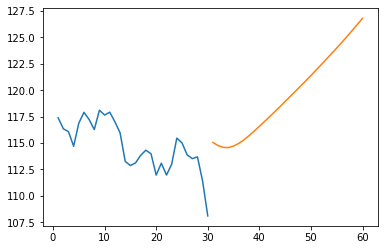

In [80]:
plt.plot(day_new, scaler.inverse_transform(close_df[221:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.show()

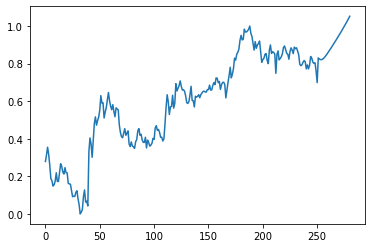

In [83]:
new_df = close_df.tolist()
new_df.extend(lst_output)
plt.plot(new_df)